In [28]:
import torchvision
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

In [29]:
train_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        transforms.RandomVerticalFlip(0.5),
        transforms.RandomCrop(32, padding=4),
    ]
)
test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    ]
)

In [30]:
train_data = datasets.CIFAR10(
    root="../data", train=True, download=True, transform=train_transform
)
val_data = datasets.CIFAR10(
    root="../data", train=True, download=False, transform=test_transform
)

Files already downloaded and verified


In [31]:
# Generate indices for train and validation set
total_indices = list(range(len(train_data)))
train_indices, val_indices = train_test_split(
    total_indices, test_size=0.1, random_state=0
)
train_indices[0:9], val_indices[0:9]

([19977, 31768, 43126, 29441, 6245, 47754, 23287, 21416, 46401],
 [11841, 19602, 45519, 25747, 42642, 31902, 30346, 12363, 32490])

In [32]:
train_data = Subset(train_data, train_indices)
val_data = Subset(val_data, val_indices)

len(train_data), len(val_data)

(45000, 5000)

In [50]:
train_dataloader = DataLoader(train_data, batch_size=4, shuffle=True, pin_memory=False)
val_dataloader = DataLoader(val_data, batch_size=4, shuffle=False, pin_memory=False)

In [63]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_dataloader)

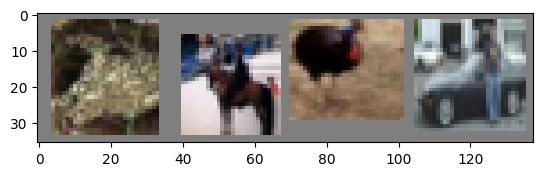

In [70]:
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))